NumPy: Efficient array manipulation and mathematical functions.

Pandas: Data manipulation and analysis using Series and DataFrame.

Seaborn: High-level data visualization built on Matplotlib.

TensorFlow: Open-source framework for building and training machine learning models.

TensorFlow Hub: Repository of pre-trained machine learning models.

Matplotlib: Versatile plotting library for creating various visualizations.

Scikit-learn: Machine learning library with algorithms and utilities.

LabelEncoder: Converts categorical labels to numerical.

StandardScaler: Preprocessing to standardize features.

Classification Report: Summarizes classification model metrics.

Confusion Matrix: Evaluates classification model performance.

Keras: High-level neural networks API within TensorFlow.

Dense: Neural network layer with all-to-all connections.

Dropout: Prevents overfitting by deactivating neurons.

EarlyStopping: Keras callback to stop training based on criteria.

L2 Regularizer: Technique to prevent overfitting via weight penalty.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Step 1: Load and Show Data

In [2]:
df = pd.read_csv('MalwareMemoryDump.csv')
df.head()  # Display the first few rows of the dataframe

,Raw_Type,pslist_nproc,pslist_nppid,pslist_avg_threads,pslist_nprocs64bit,pslist_avg_handlers,dlllist_ndlls,dlllist_avg_dlls_per_proc,handles_nhandles,handles_avg_handles_per_proc,...,svcscan_fs_drivers,svcscan_process_services,svcscan_shared_process_services,svcscan_interactive_process_services,svcscan_nactive,callbacks_ncallbacks,callbacks_nanonymous,SubType,callbacks_ngeneric,Label
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,26,24,116,0,121,87,0,Benign,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,26,24,118,0,122,87,0,Benign,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,26,27,118,0,120,88,0,Benign,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,26,27,118,0,120,88,0,Benign,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,26,24,118,0,124,87,0,Benign,8,Benign


In [3]:
df.describe()

,pslist_nproc,pslist_nppid,pslist_avg_threads,pslist_nprocs64bit,pslist_avg_handlers,dlllist_ndlls,dlllist_avg_dlls_per_proc,handles_nhandles,handles_avg_handles_per_proc,handles_nport,...,svcscan_nservices,svcscan_kernel_drivers,svcscan_fs_drivers,svcscan_process_services,svcscan_shared_process_services,svcscan_interactive_process_services,svcscan_nactive,callbacks_ncallbacks,callbacks_nanonymous,callbacks_ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


# step 2 : cleaning data

In [4]:
df.isnull().sum()

Raw_Type                                  0
pslist_nproc                              0
pslist_nppid                              0
pslist_avg_threads                        0
pslist_nprocs64bit                        0
pslist_avg_handlers                       0
dlllist_ndlls                             0
dlllist_avg_dlls_per_proc                 0
handles_nhandles                          0
handles_avg_handles_per_proc              0
handles_nport                             0
handles_nfile                             0
handles_nevent                            0
handles_ndesktop                          0
handles_nkey                              0
handles_nthread                           0
handles_ndirectory                        0
handles_nsemaphore                        0
handles_ntimer                            0
handles_nsection                          0
handles_nmutant                           0
ldrmodules_not_in_load                    0
ldrmodules_not_in_init          

In [5]:
df.drop_duplicates(inplace = True)

<ipython-input-6-3e3fe450ceff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)


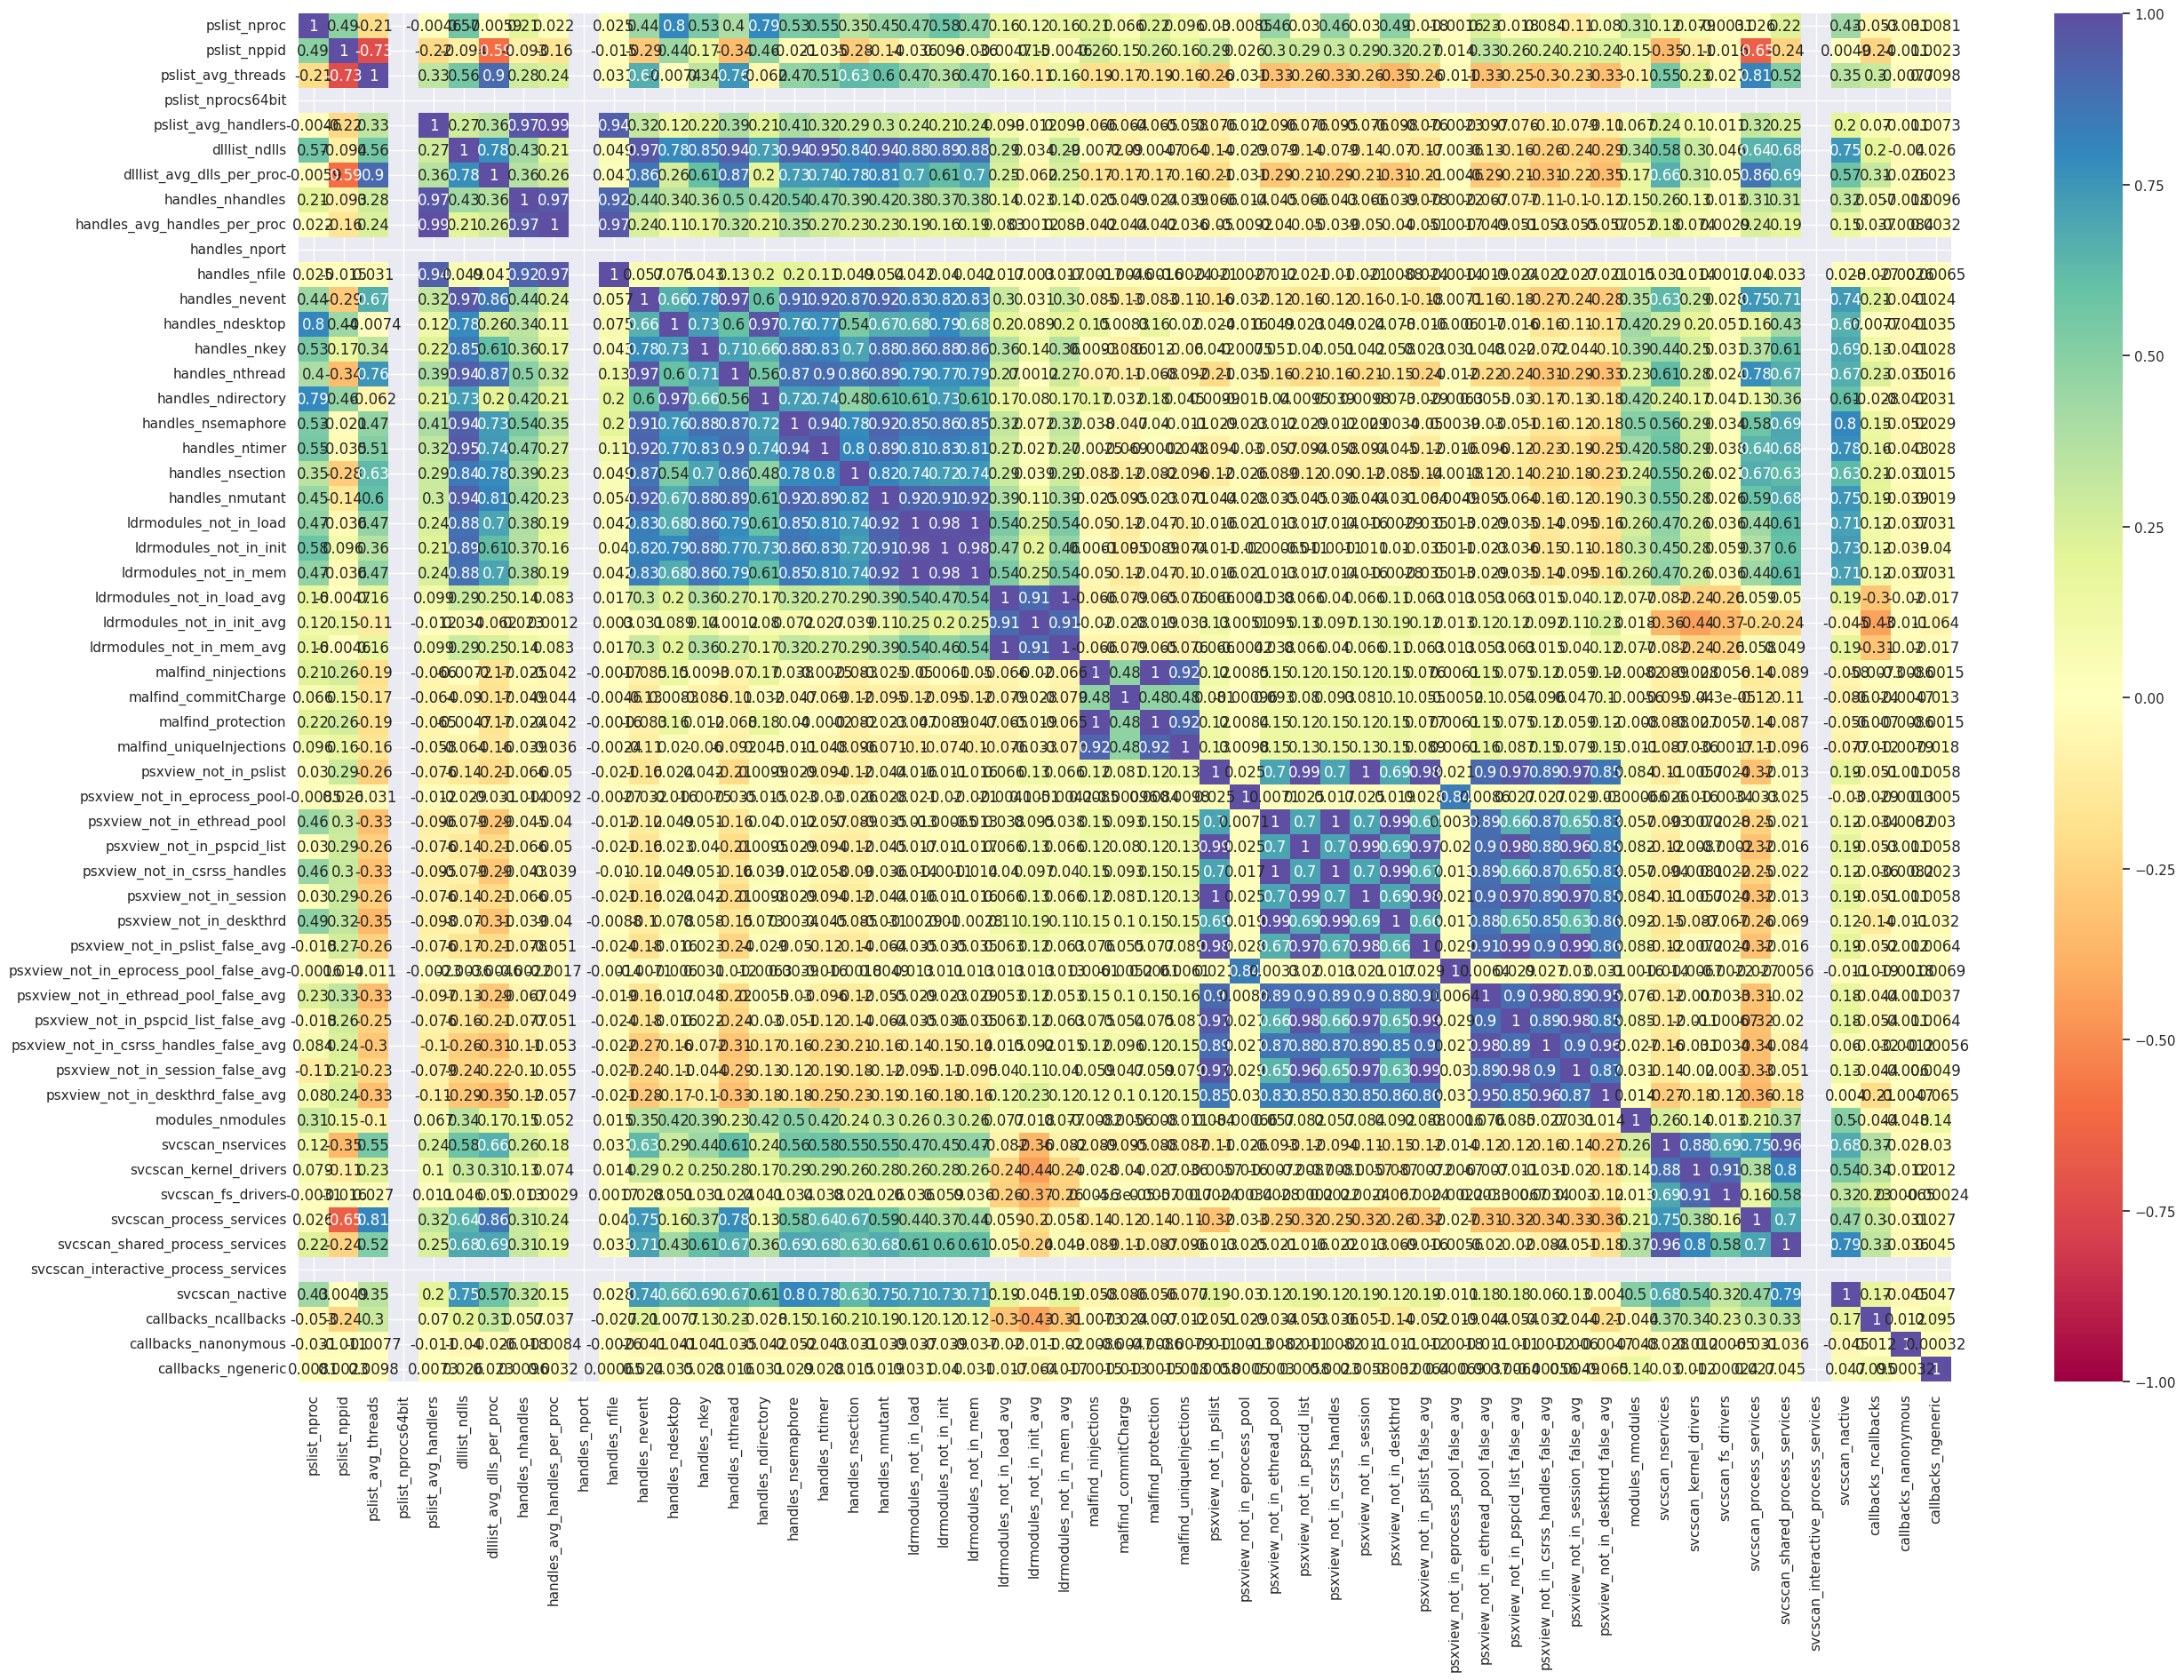

In [6]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()

In [7]:
df = df.drop(['pslist_nprocs64bit','svcscan_interactive_process_services','handles_nport','Raw_Type','SubType'],axis=1)

In [8]:
df.head()

,pslist_nproc,pslist_nppid,pslist_avg_threads,pslist_avg_handlers,dlllist_ndlls,dlllist_avg_dlls_per_proc,handles_nhandles,handles_avg_handles_per_proc,handles_nfile,handles_nevent,...,svcscan_nservices,svcscan_kernel_drivers,svcscan_fs_drivers,svcscan_process_services,svcscan_shared_process_services,svcscan_nactive,callbacks_ncallbacks,callbacks_nanonymous,callbacks_ngeneric,Label
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,389,221,26,24,116,121,87,0,8,Benign
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,392,222,26,24,118,122,87,0,8,Benign
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,395,222,26,27,118,120,88,0,8,Benign
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,395,222,26,27,118,120,88,0,8,Benign
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,392,222,26,24,118,124,87,0,8,Benign


# step 3 : make preprocessing for data

preparing my data for proccessing by separating features and labels, converting categorical labels to numerical format using LabelEncoder, and printing the feature values.

In [9]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
le = LabelEncoder()
y = le.fit_transform(y)
print(x)
print(y)

[[45.         17.         10.55555556 ... 87.          0.
   8.        ]
 [47.         19.         11.53191489 ... 87.          0.
   8.        ]
 [40.         14.         14.725      ... 88.          0.
   8.        ]
 ...
 [38.         15.          9.84210526 ... 88.          0.
   8.        ]
 [37.         15.         10.24324324 ... 87.          0.
   8.        ]
 [38.         15.          9.86842105 ... 86.          0.
   8.        ]]
[0 0 0 ... 1 1 1]


# step 4: split data

splitting the data into training and testing sets, and then applying feature scaling using StandardScaler to ensure that the features are on the same scale for both the training and testing data. This help me in prepareing the data for training and evaluating DL models in a consistent and standardized manner.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

# step 5 : building model from scratch

Sequential Architecture: Sequential models are easy to build and understand, making them suitable for various tasks.

Adam Optimizer: The Adam optimizer adapts the learning rate based on the progress of training, leading to faster convergence.

Sigmoid Activation: Sigmoid activation in the output layer is suitable for
binary classification tasks, providing probability scores.

ReLU : activation functions in the hidden layers of the deep learning model benefits the training process and the model's capacity to learn complex relationships within the data. Its non-linearity, computational efficiency, and gradient propagation properties make it a popular choice in the development of deep neural networks.

In [11]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print("Deep Learning Model Accuracy:", accuracy)

Epoch 1/50
1162/1162 [==============================] - 10s 6ms/step - loss: 31.7414 - accuracy: 0.5359 - val_loss: 1.1914 - val_accuracy: 0.5567
Epoch 2/50
1162/1162 [==============================] - 2s 2ms/step - loss: 1.3902 - accuracy: 0.5614 - val_loss: 1.0878 - val_accuracy: 0.9756
Epoch 3/50
1162/1162 [==============================] - 3s 2ms/step - loss: 1.1365 - accuracy: 0.6316 - val_loss: 0.9043 - val_accuracy: 0.9826
Epoch 4/50
1162/1162 [==============================] - 3s 3ms/step - loss: 1.0969 - accuracy: 0.5456 - val_loss: 1.0250 - val_accuracy: 0.5547
Epoch 5/50
1162/1162 [==============================] - 3s 2ms/step - loss: 1.0078 - accuracy: 0.5464 - val_loss: 0.9558 - val_accuracy: 0.5550
Epoch 6/50
1162/1162 [==============================] - 3s 2ms/step - loss: 0.9456 - accuracy: 0.5466 - val_loss: 0.8919 - val_accuracy: 0.5551
Epoch 7/50
1162/1162 [==============================] - 2s 2ms/step - loss: 0.8744 - accuracy: 0.5457 - val_loss: 0.8357 - val_accurac

In [12]:
shape = df.shape
shape

(58062, 53)

# step 6 : using pre trained model by generate random numbers

generates a random data row, scales it using the trained scaler, predicts its label using the trained model, converts the predicted label back to its original categorical form, and then prints the predicted label. This can be useful for testing the model's performance on new, unseen data.

In [13]:
# Generate random data for the new row
num_samples = 1  # Number of new rows to add
random_data = np.random.rand(num_samples, df.shape[1] - 1)  # Exclude the label column
# Scale the random data using the trained scaler
random_data_scaled = sc.transform(random_data)
# Predict the label for the new row
predicted_probs = model.predict(random_data_scaled)
predicted_labels = (predicted_probs > 0.5).astype(int)
# Inverse transform the predicted label using the trained label encoder
predicted_labels = le.inverse_transform(predicted_labels.flatten())  # Flatten before inverse transform
# Print the predicted label
print("Predicted Label for New Row:")
print(predicted_labels)

1/1 [==============================] - 0s 90ms/step
Predicted Label for New Row:
['Benign']


In [14]:
# Evaluate the model on the test set
test_accuracy = model.evaluate(x_test, y_test)[1]
print("Test Set Accuracy:", test_accuracy)

363/363 [==============================] - 1s 1ms/step - loss: 0.8775 - accuracy: 0.4992
Test Set Accuracy: 0.49918195605278015


how the training and validation losses change over the epochs during the training process.

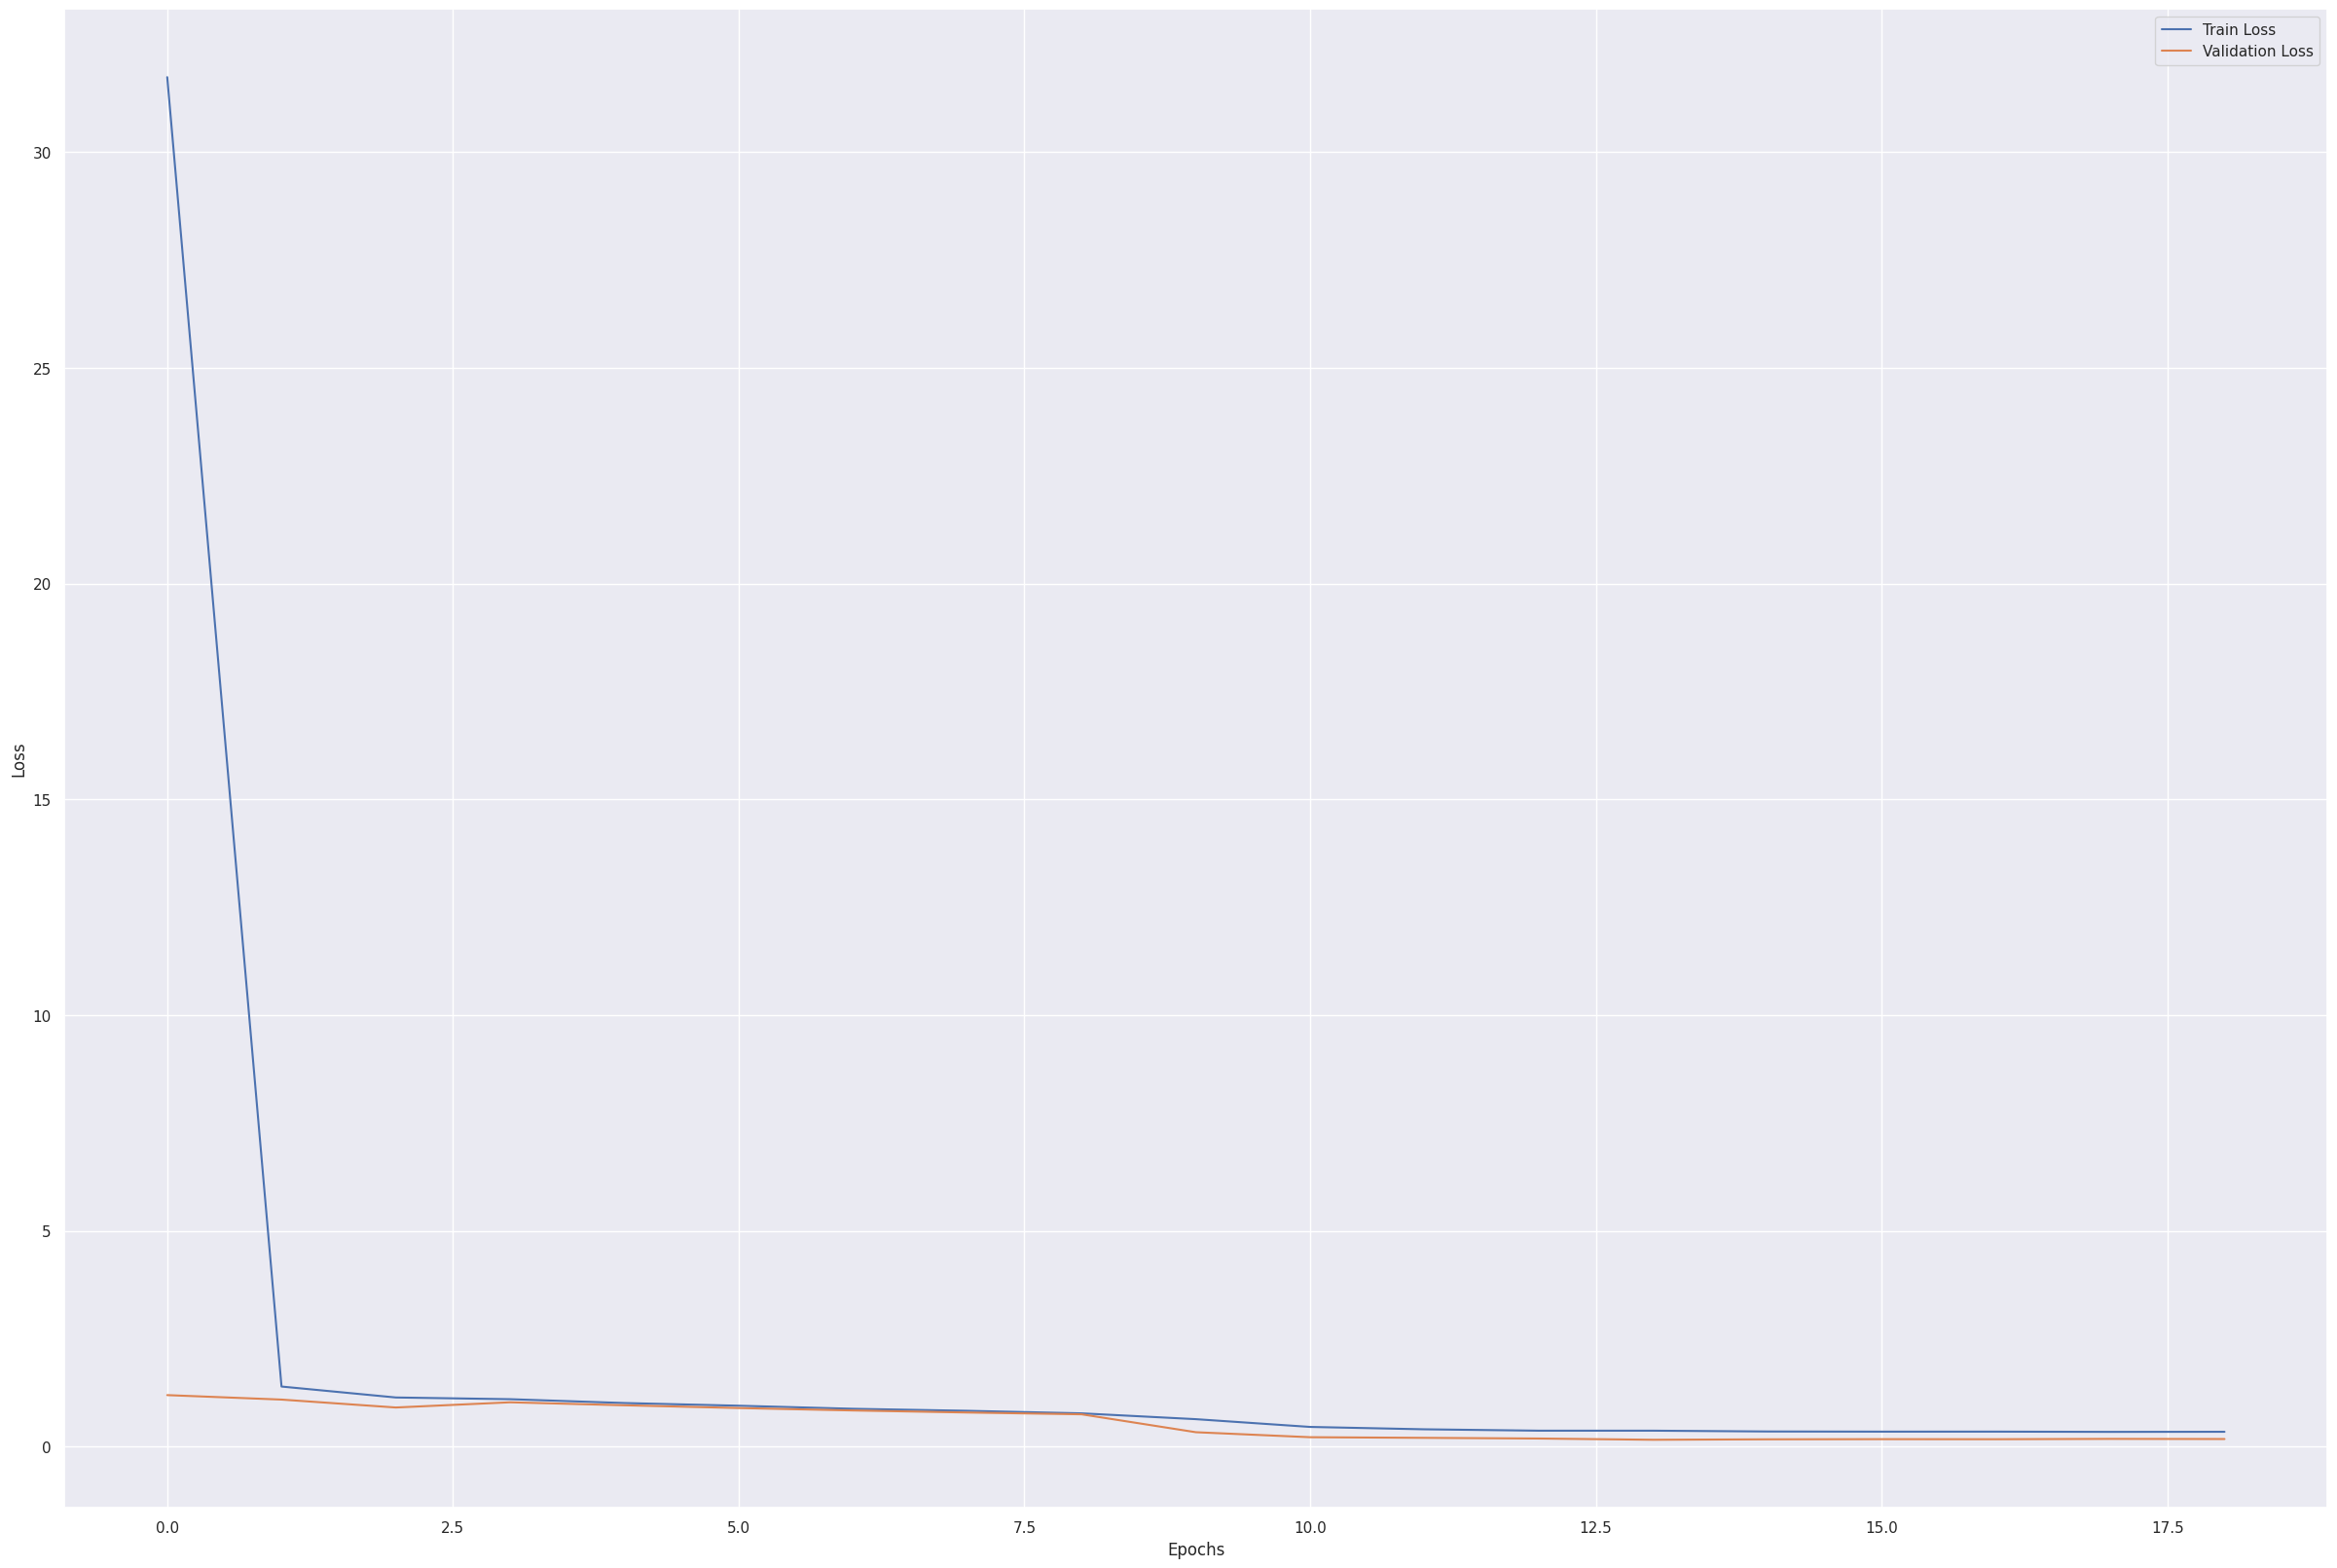

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

how the training accuracy and validation accuracy change over the epochs during the training process.

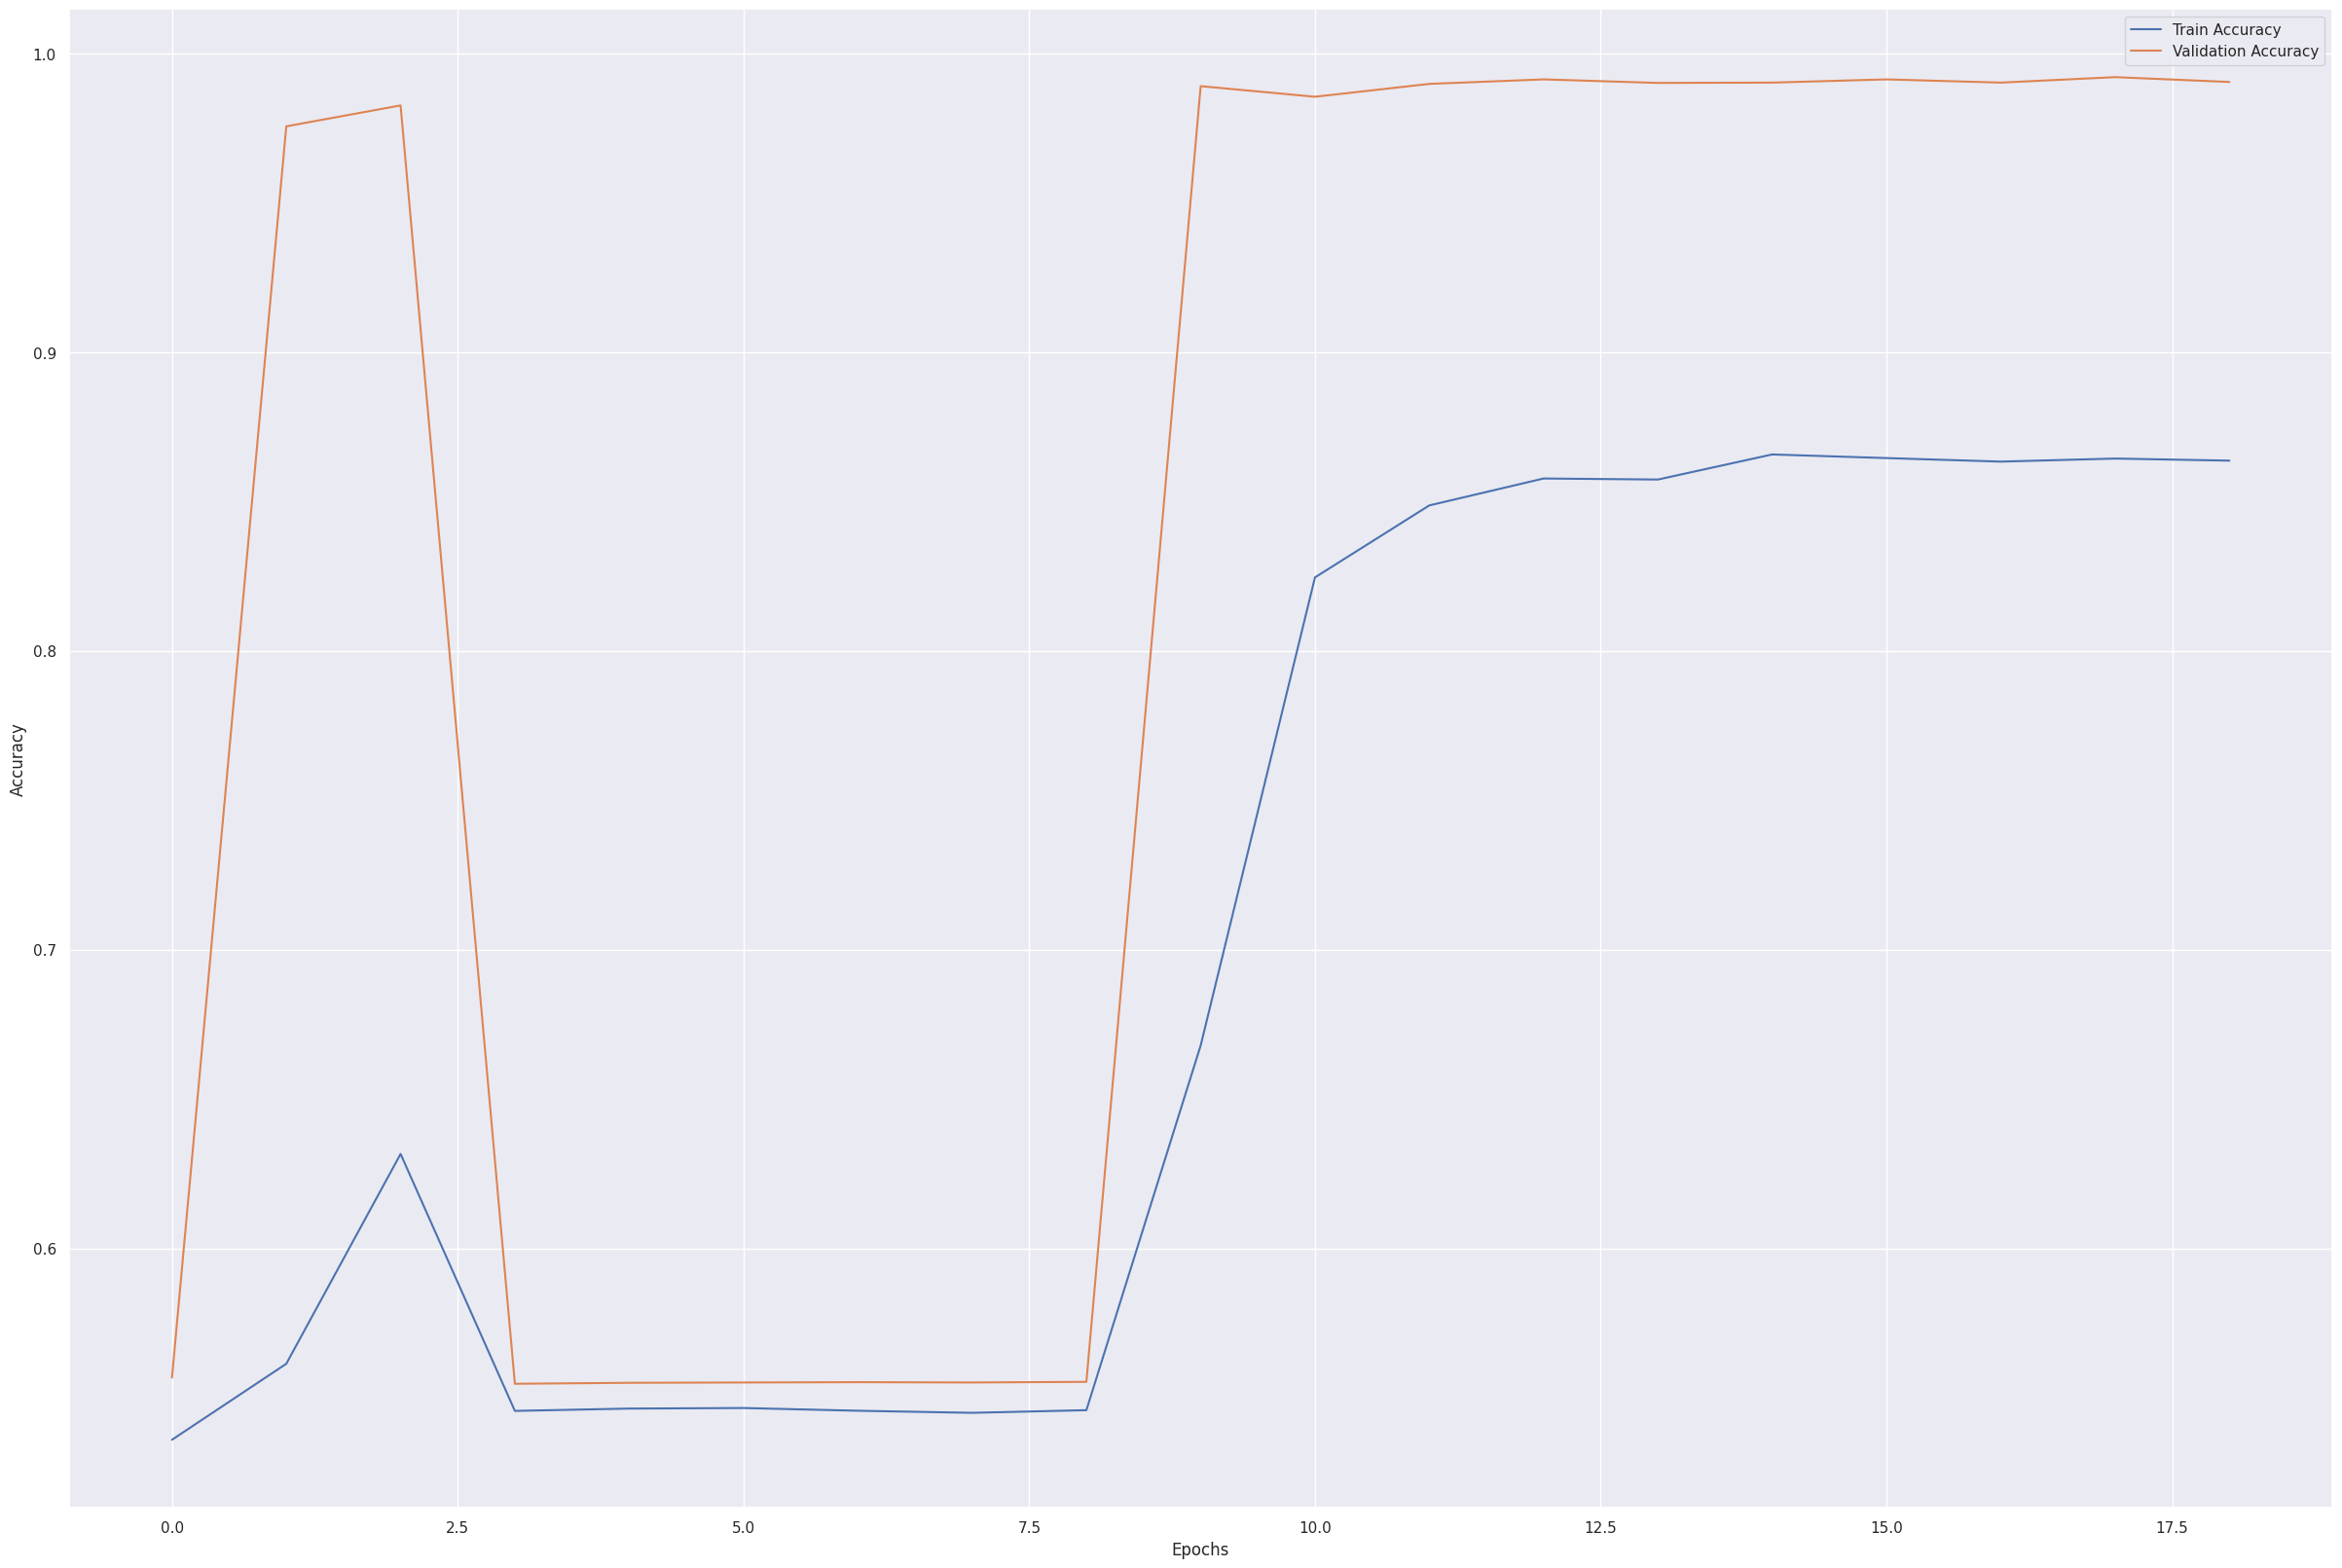

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 how well your classification model is performing.

363/363 [==============================] - 0s 1ms/step
True Positives: 5797
True Negatives: 0
False Positives: 5804
False Negatives: 12


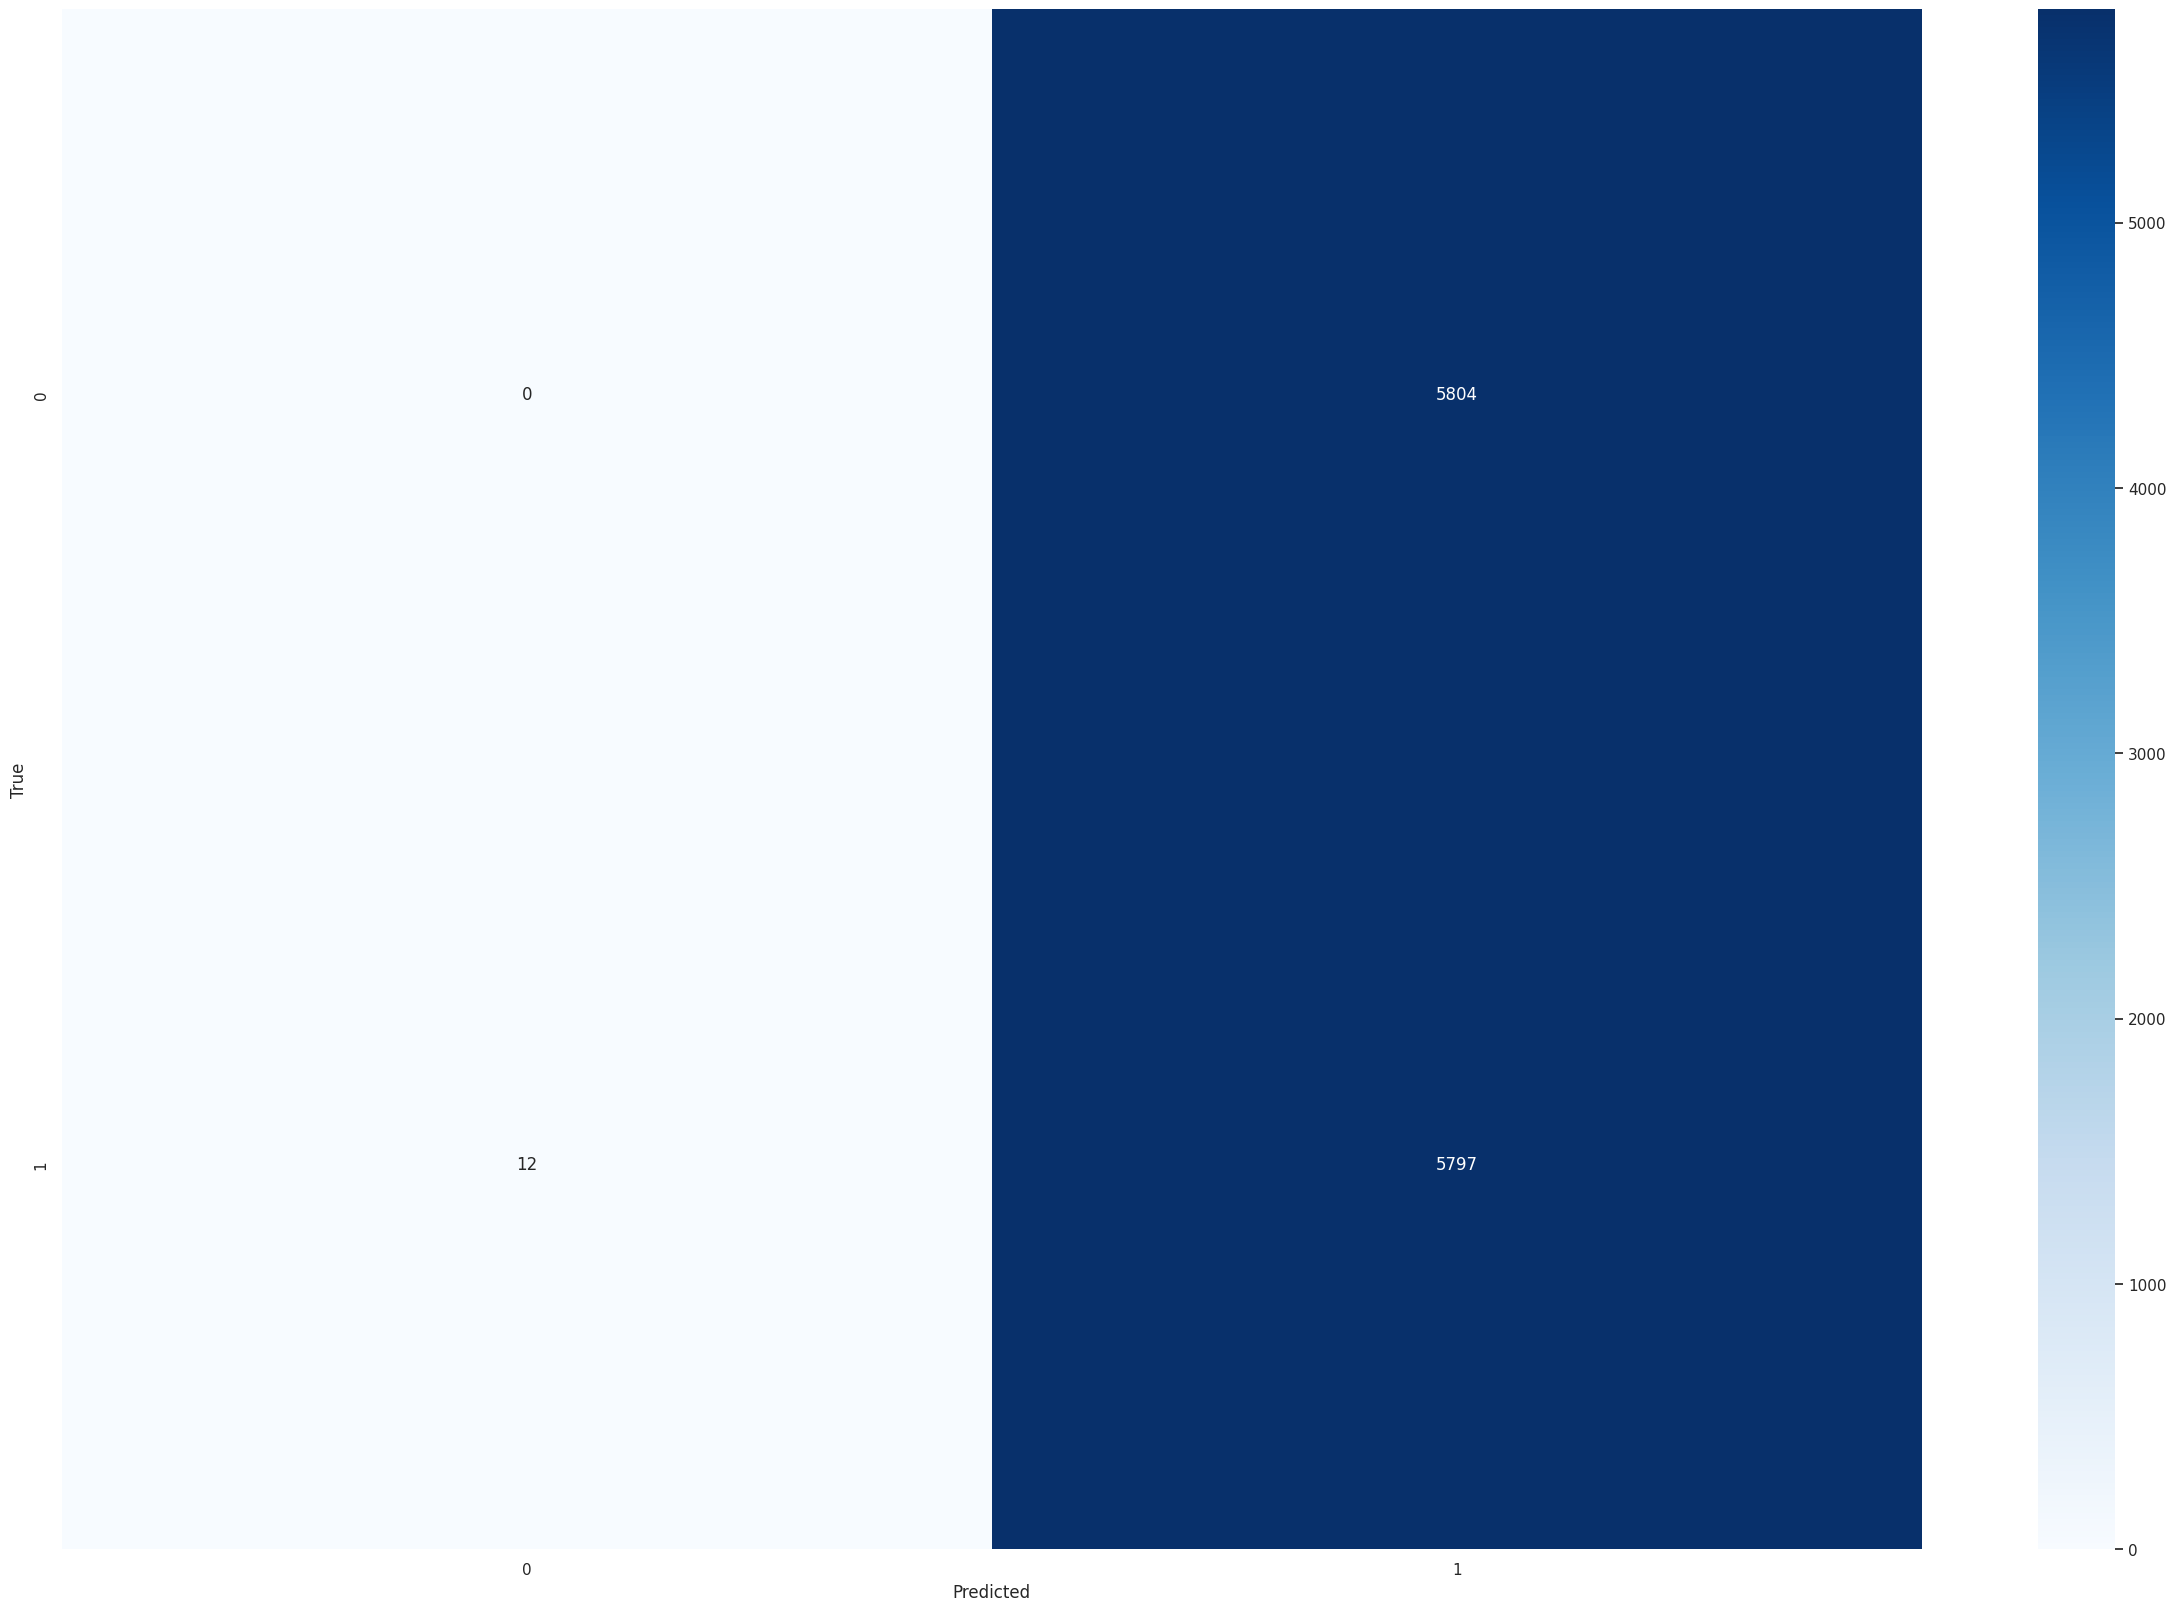

In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
# Print TP, TN, FP, FN
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This count plot provides a visual representation of how many times each predicted label appears in the y_pred_classes array. It can give you insight into the distribution of predictions made by your model.

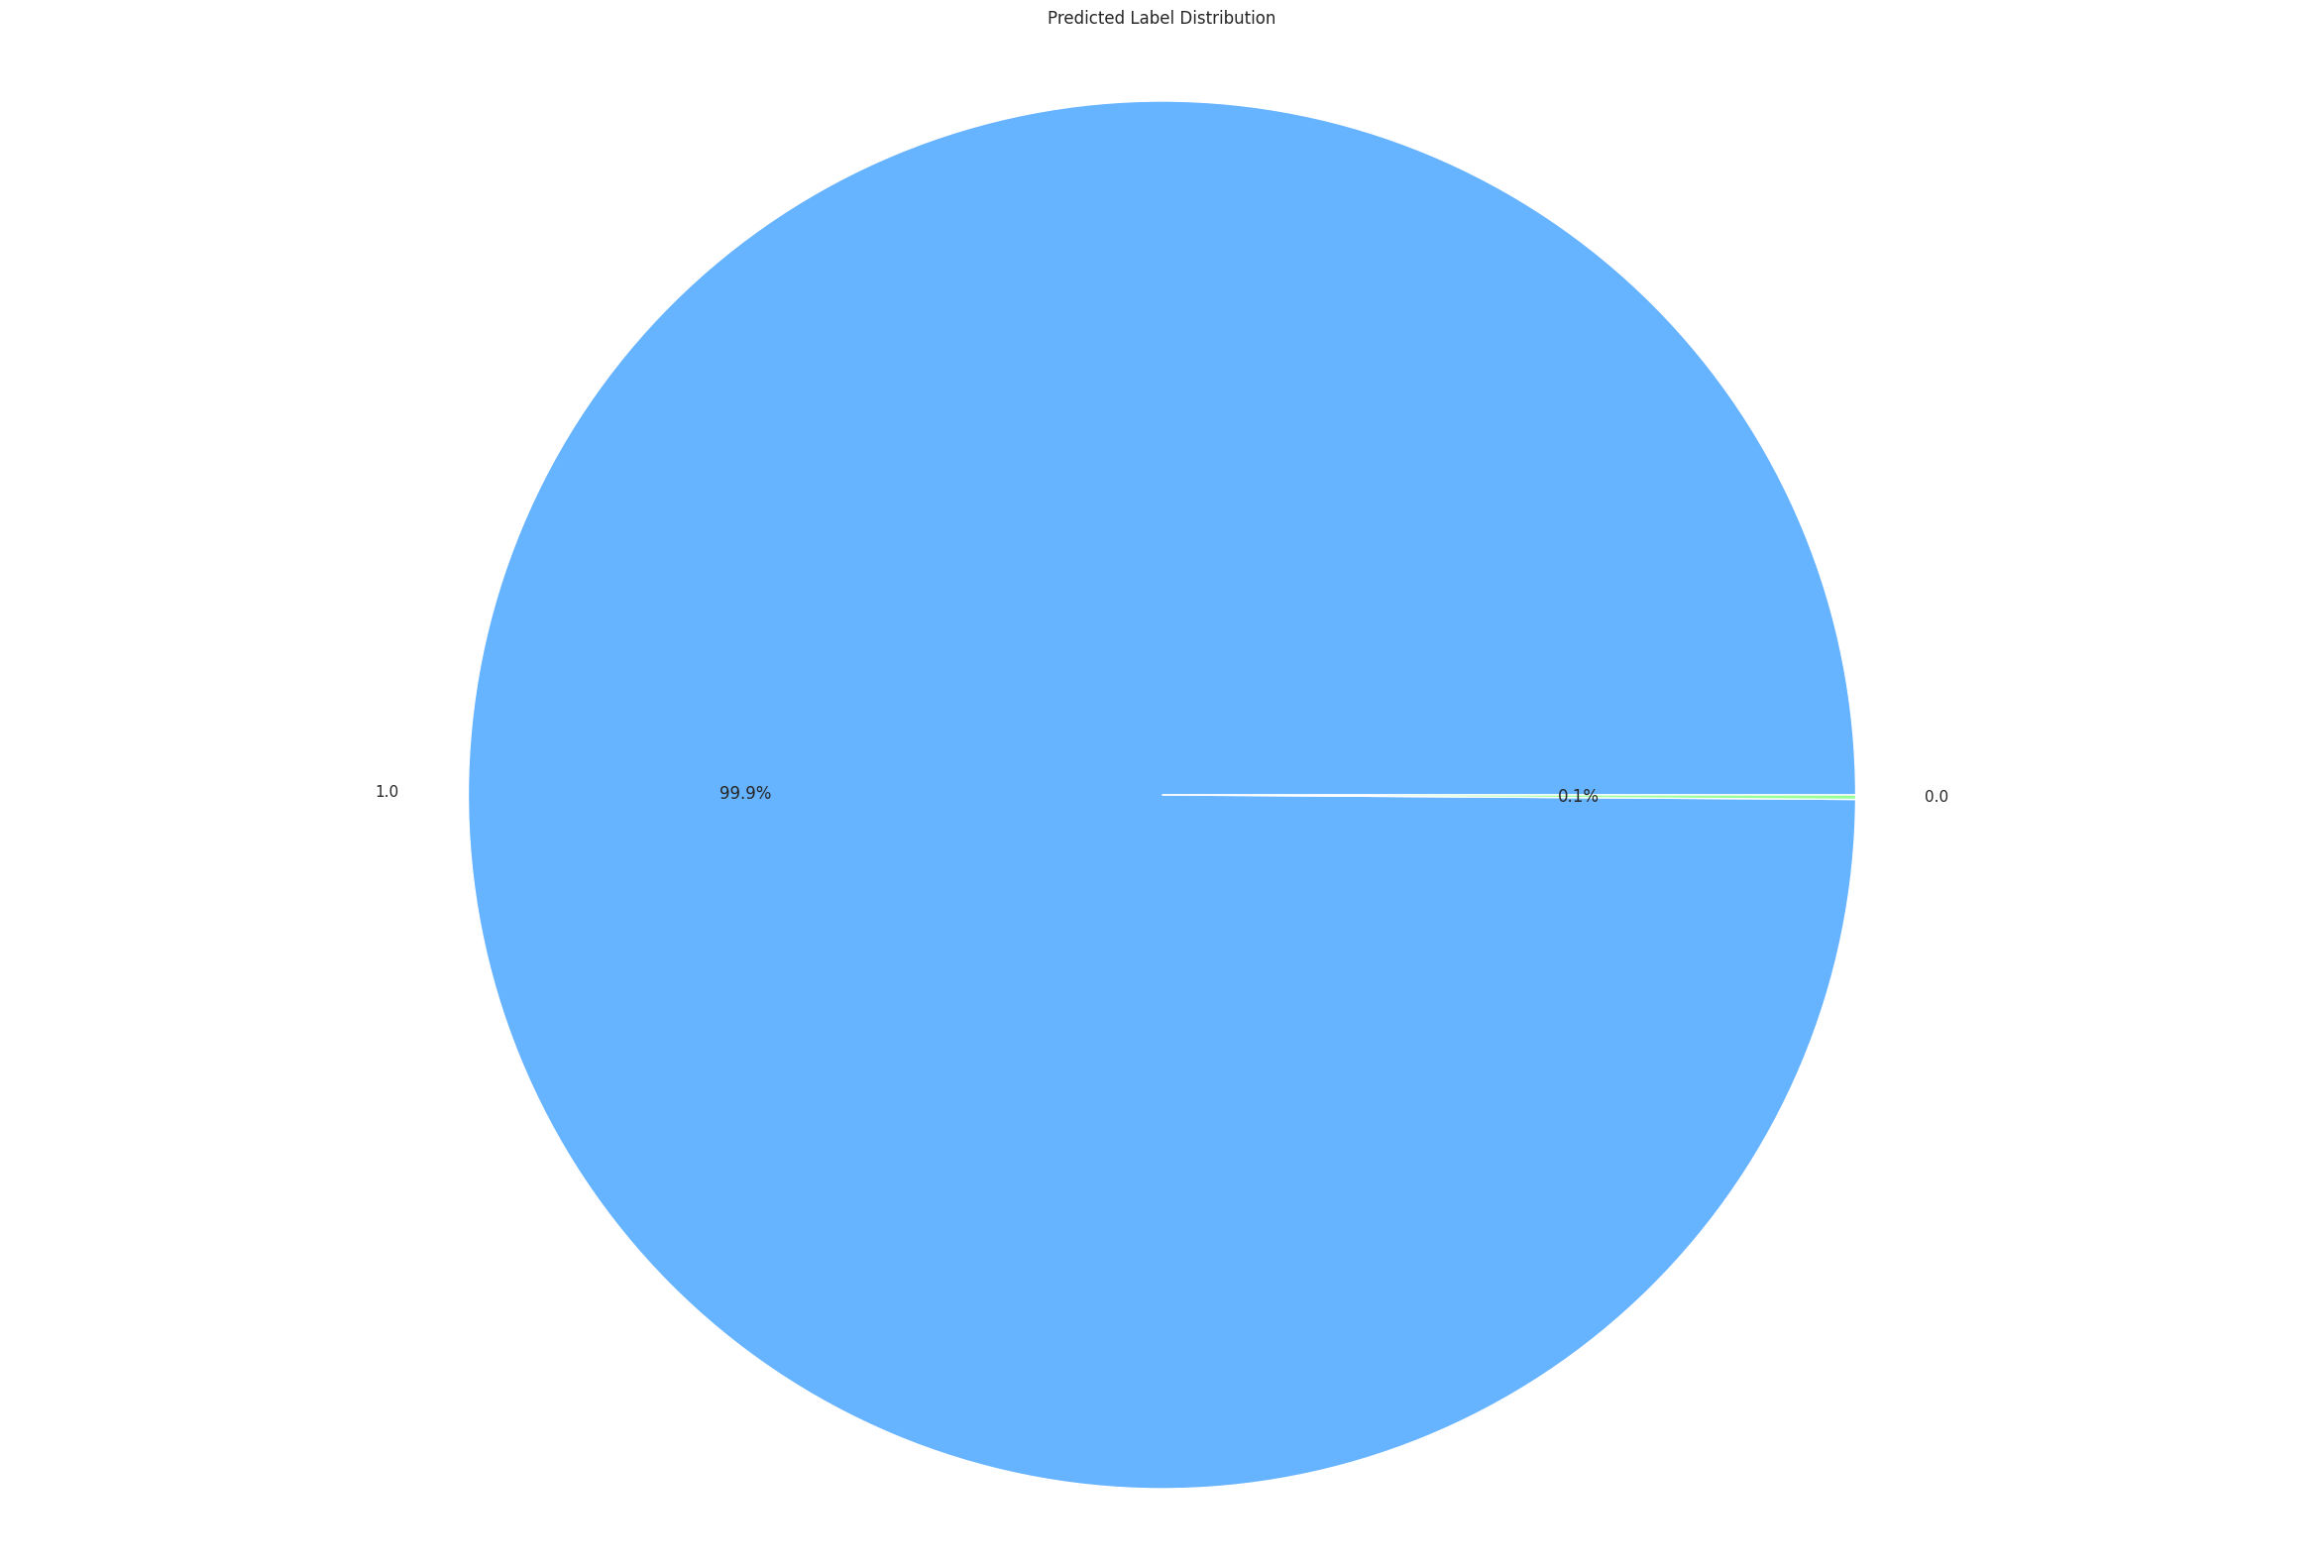

In [18]:
from collections import Counter
# Calculate the counts of each predicted label
label_counts = Counter(y_pred_classes.flatten())
# Get the labels and counts
labels = list(label_counts.keys())
counts = list(label_counts.values())
# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Predicted Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()